In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('dfavgscores238.xlsx', index_col= 0)

In [3]:
df['avgscore_binned'] = pd.cut(df['avgscore'], bins=10)

In [4]:
# Create a contingency table
contingency_table = pd.crosstab(df['ASBH02A'], df['avgscore_binned'])

In [11]:
contingency_table

avgscore_binned,"(83.869, 151.789]","(151.789, 219.036]","(219.036, 286.283]","(286.283, 353.53]","(353.53, 420.777]","(420.777, 488.024]","(488.024, 555.271]","(555.271, 622.517]","(622.517, 689.764]","(689.764, 757.011]"
ASBH02A,,,,,,,,,,
No,3,55,182,358,540,718,629,331,70,4
Yes,135,855,2163,3395,5255,7834,9656,7313,1783,86


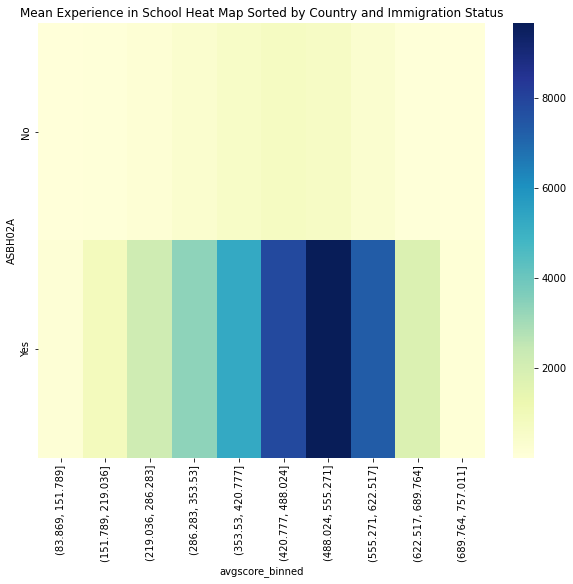

In [6]:
# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=False, cmap='YlGnBu')
plt.title('Mean Experience in School Heat Map Sorted by Country and Immigration Status')
plt.show()

In [7]:
# Convert the contingency table to a format suitable for Plotly
contingency_table_reset = contingency_table.reset_index()

In [8]:
contingency_table_melted = contingency_table_reset.melt(id_vars='ASBH02A', var_name='avgscore_binned', value_name='count')

In [9]:
# Convert Interval objects to strings
contingency_table_melted['avgscore_binned'] = contingency_table_melted['avgscore_binned'].astype(str)

In [12]:
contingency_table_melted

,ASBH02A,avgscore_binned,count
0,No,"(83.869, 151.789]",3
1,Yes,"(83.869, 151.789]",135
2,No,"(151.789, 219.036]",55
3,Yes,"(151.789, 219.036]",855
4,No,"(219.036, 286.283]",182
5,Yes,"(219.036, 286.283]",2163
6,No,"(286.283, 353.53]",358
7,Yes,"(286.283, 353.53]",3395
8,No,"(353.53, 420.777]",540
9,Yes,"(353.53, 420.777]",5255


In [13]:
# Convert avgscore_binned to categorical with the specified order
contingency_table_melted['avgscore_binned'] = pd.Categorical(contingency_table_melted['avgscore_binned'], 
                                       categories=[
                                           '(83.869, 151.789]', '(151.789, 219.036]', '(219.036, 286.283]', 
                                           '(286.283, 353.53]', '(353.53, 420.777]', '(420.777, 488.024]', 
                                           '(488.024, 555.271]', '(555.271, 622.517]', '(622.517, 689.764]', 
                                           '(689.764, 757.011]'], 
                                       ordered=True)

In [34]:
contingency_table_melted

,ASBH02A,avgscore_binned,count
0,No,"(83.869, 151.789]",3
1,Yes,"(83.869, 151.789]",135
2,No,"(151.789, 219.036]",55
3,Yes,"(151.789, 219.036]",855
4,No,"(219.036, 286.283]",182
5,Yes,"(219.036, 286.283]",2163
6,No,"(286.283, 353.53]",358
7,Yes,"(286.283, 353.53]",3395
8,No,"(353.53, 420.777]",540
9,Yes,"(353.53, 420.777]",5255


In [35]:
# Calculate total counts for 'No' and 'Yes'
total_no = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'No']['count'].sum()
total_yes = contingency_table_melted[contingency_table_melted['ASBH02A'] == 'Yes']['count'].sum()

# Calculate the percentage
contingency_table_melted['percentage'] = contingency_table_melted.apply(lambda row: (row['count'] / total_no * 100) if row['ASBH02A'] == 'No' else (row['count'] / total_yes * 100), axis=1)

In [36]:
contingency_table_melted

,ASBH02A,avgscore_binned,count,percentage
0,No,"(83.869, 151.789]",3,0.103806
1,Yes,"(83.869, 151.789]",135,0.350877
2,No,"(151.789, 219.036]",55,1.903114
3,Yes,"(151.789, 219.036]",855,2.222222
4,No,"(219.036, 286.283]",182,6.297578
5,Yes,"(219.036, 286.283]",2163,5.621832
6,No,"(286.283, 353.53]",358,12.387543
7,Yes,"(286.283, 353.53]",3395,8.823912
8,No,"(353.53, 420.777]",540,18.685121
9,Yes,"(353.53, 420.777]",5255,13.658220


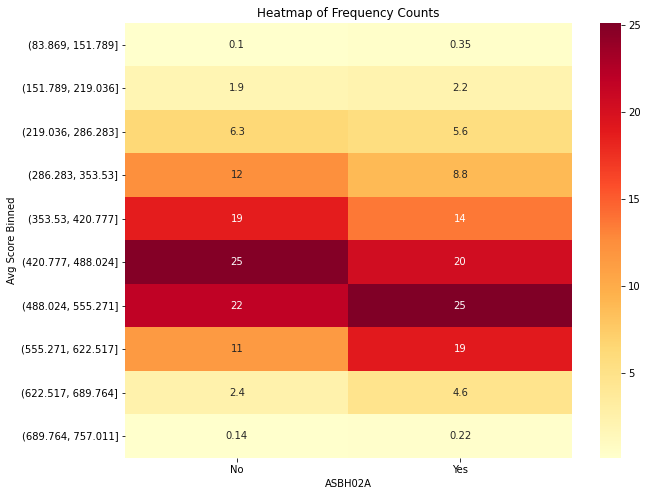

In [38]:
# Assuming contingency_table_melted is your DataFrame
# You might need to pivot the DataFrame to create a matrix for the heatmap
## index, column, values
heatmap_data = contingency_table_melted.pivot(index = "avgscore_binned", columns = "ASBH02A", values = "percentage")

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True)

# Add title and labels
plt.title('Heatmap of Frequency Counts')
plt.xlabel('ASBH02A')
plt.ylabel('Avg Score Binned')

# Show the plot
plt.show()